In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, skew, kurtosis

In [14]:
df=pd.read_csv("house_price.csv")

In [16]:
print("Shape:", df.shape)
print("Info:")
print(df.info())
print("Summary Statistics:")
print(df.describe())
print("Missing values:")
print(df.isnull().sum())

Shape: (13200, 7)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None
Summary Statistics:
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000 

In [18]:
df["price_per_sqtf"]=df["price"]*100000/df["total_sqft"]

a. Mean and standard deviation

In [20]:
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()
df_mean_std = df[(df['price_per_sqft'] > (mean - 3*std)) & (df['price_per_sqft'] < (mean + 3*std))]

b. Percentile Method

In [22]:
lower_percentile = df['price_per_sqft'].quantile(0.05)
upper_percentile = df['price_per_sqft'].quantile(0.95)
df_percentile = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]

c.IQR Method

In [24]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
df_iqr = df[(df['price_per_sqft'] >= (Q1 - 1.5 * IQR)) & (df['price_per_sqft'] <= (Q3 + 1.5 * IQR))]

d. Z-score Method

In [26]:
z_scores = zscore(df['price_per_sqft'])
df_zscore = df[(np.abs(z_scores) < 3)]

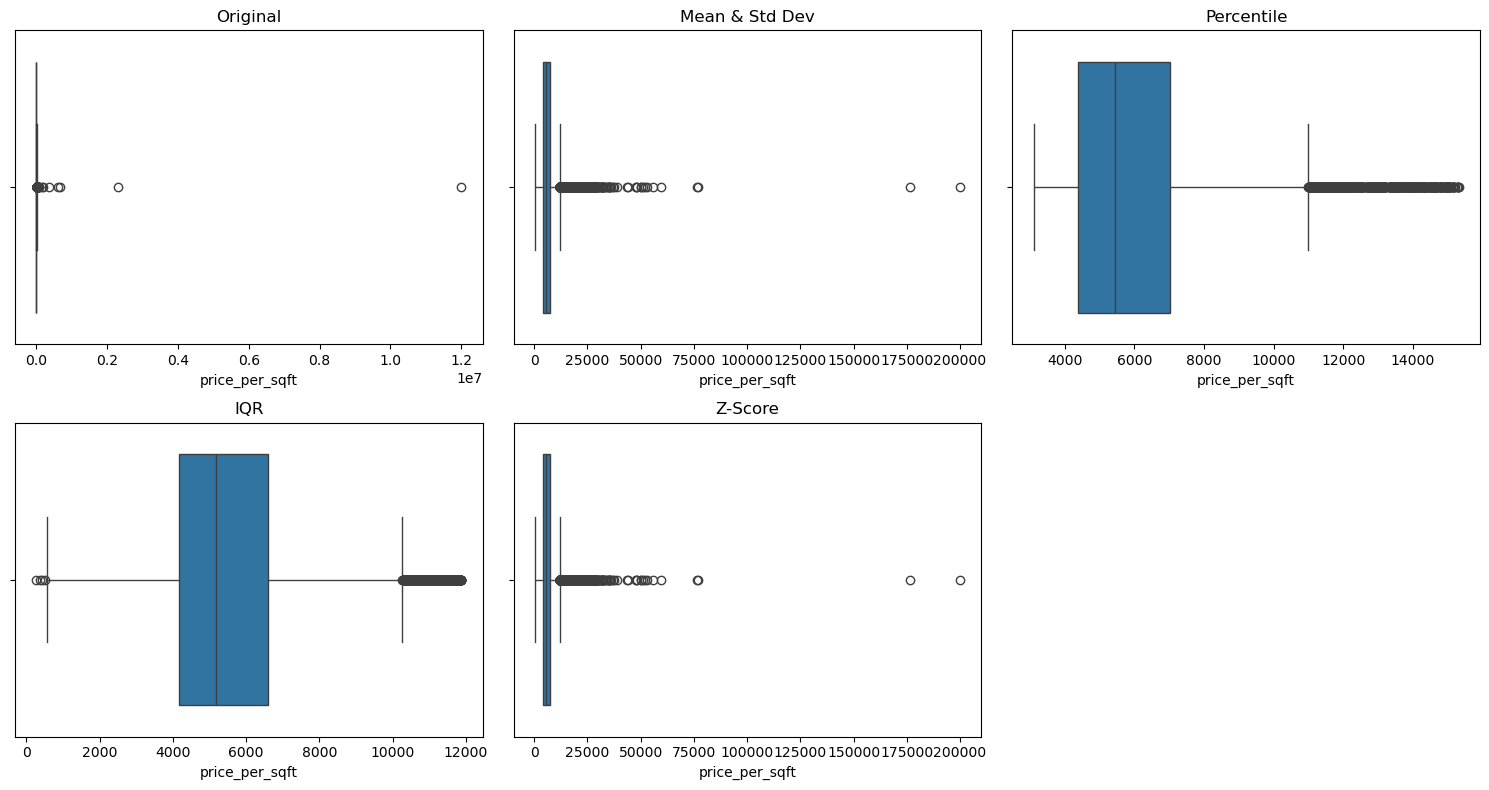

In [28]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
sns.boxplot(x=df['price_per_sqft'])
plt.title("Original")

plt.subplot(2, 3, 2)
sns.boxplot(x=df_mean_std['price_per_sqft'])
plt.title("Mean & Std Dev")

plt.subplot(2, 3, 3)
sns.boxplot(x=df_percentile['price_per_sqft'])
plt.title("Percentile")

plt.subplot(2, 3, 4)
sns.boxplot(x=df_iqr['price_per_sqft'])
plt.title("IQR")

plt.subplot(2, 3, 5)
sns.boxplot(x=df_zscore['price_per_sqft'])
plt.title("Z-Score")

plt.tight_layout()
plt.show()

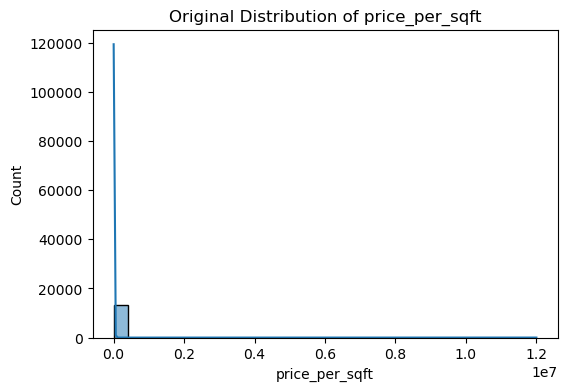

In [30]:
plt.figure(figsize=(6, 4))
sns.histplot(df['price_per_sqft'], kde=True, bins=30)
plt.title("Original Distribution of price_per_sqft")
plt.show()

In [32]:
print("Before Transformation:")
print("Skewness:", skew(df['price_per_sqft']))
print("Kurtosis:", kurtosis(df['price_per_sqft']))

Before Transformation:
Skewness: 108.26875024325159
Kurtosis: 12090.633538860382


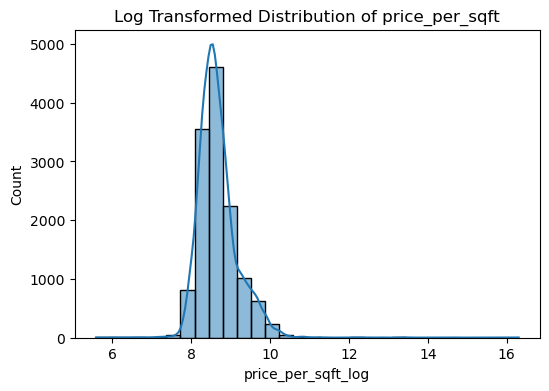

In [34]:
df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])
plt.figure(figsize=(6, 4))
sns.histplot(df['price_per_sqft_log'], kde=True, bins=30)
plt.title("Log Transformed Distribution of price_per_sqft")
plt.show()

In [36]:
print("\nAfter Log Transformation:")
print("Skewness:", skew(df['price_per_sqft_log']))
print("Kurtosis:", kurtosis(df['price_per_sqft_log']))


After Log Transformation:
Skewness: 1.4003259019533636
Kurtosis: 9.203000543610957


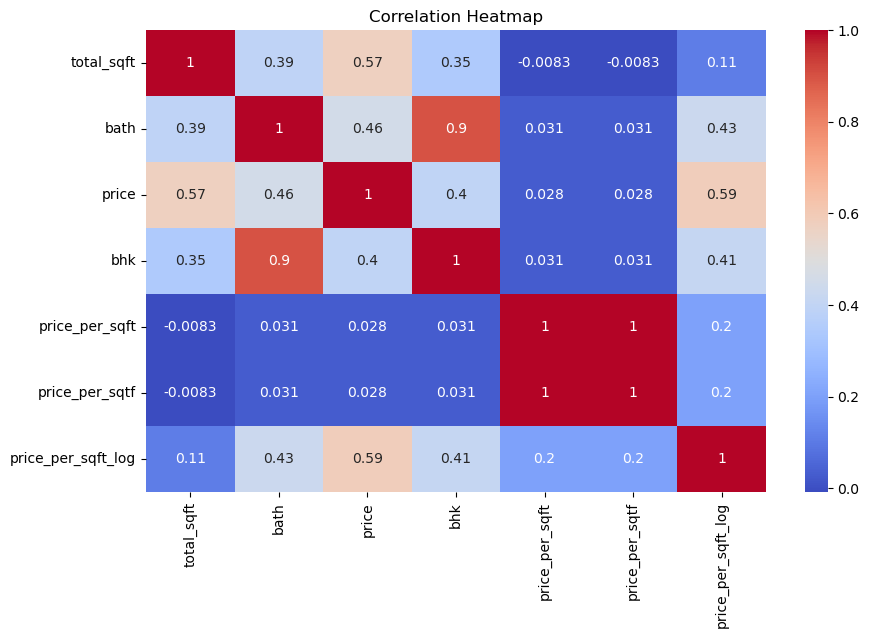

In [39]:
numeric_cols = df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

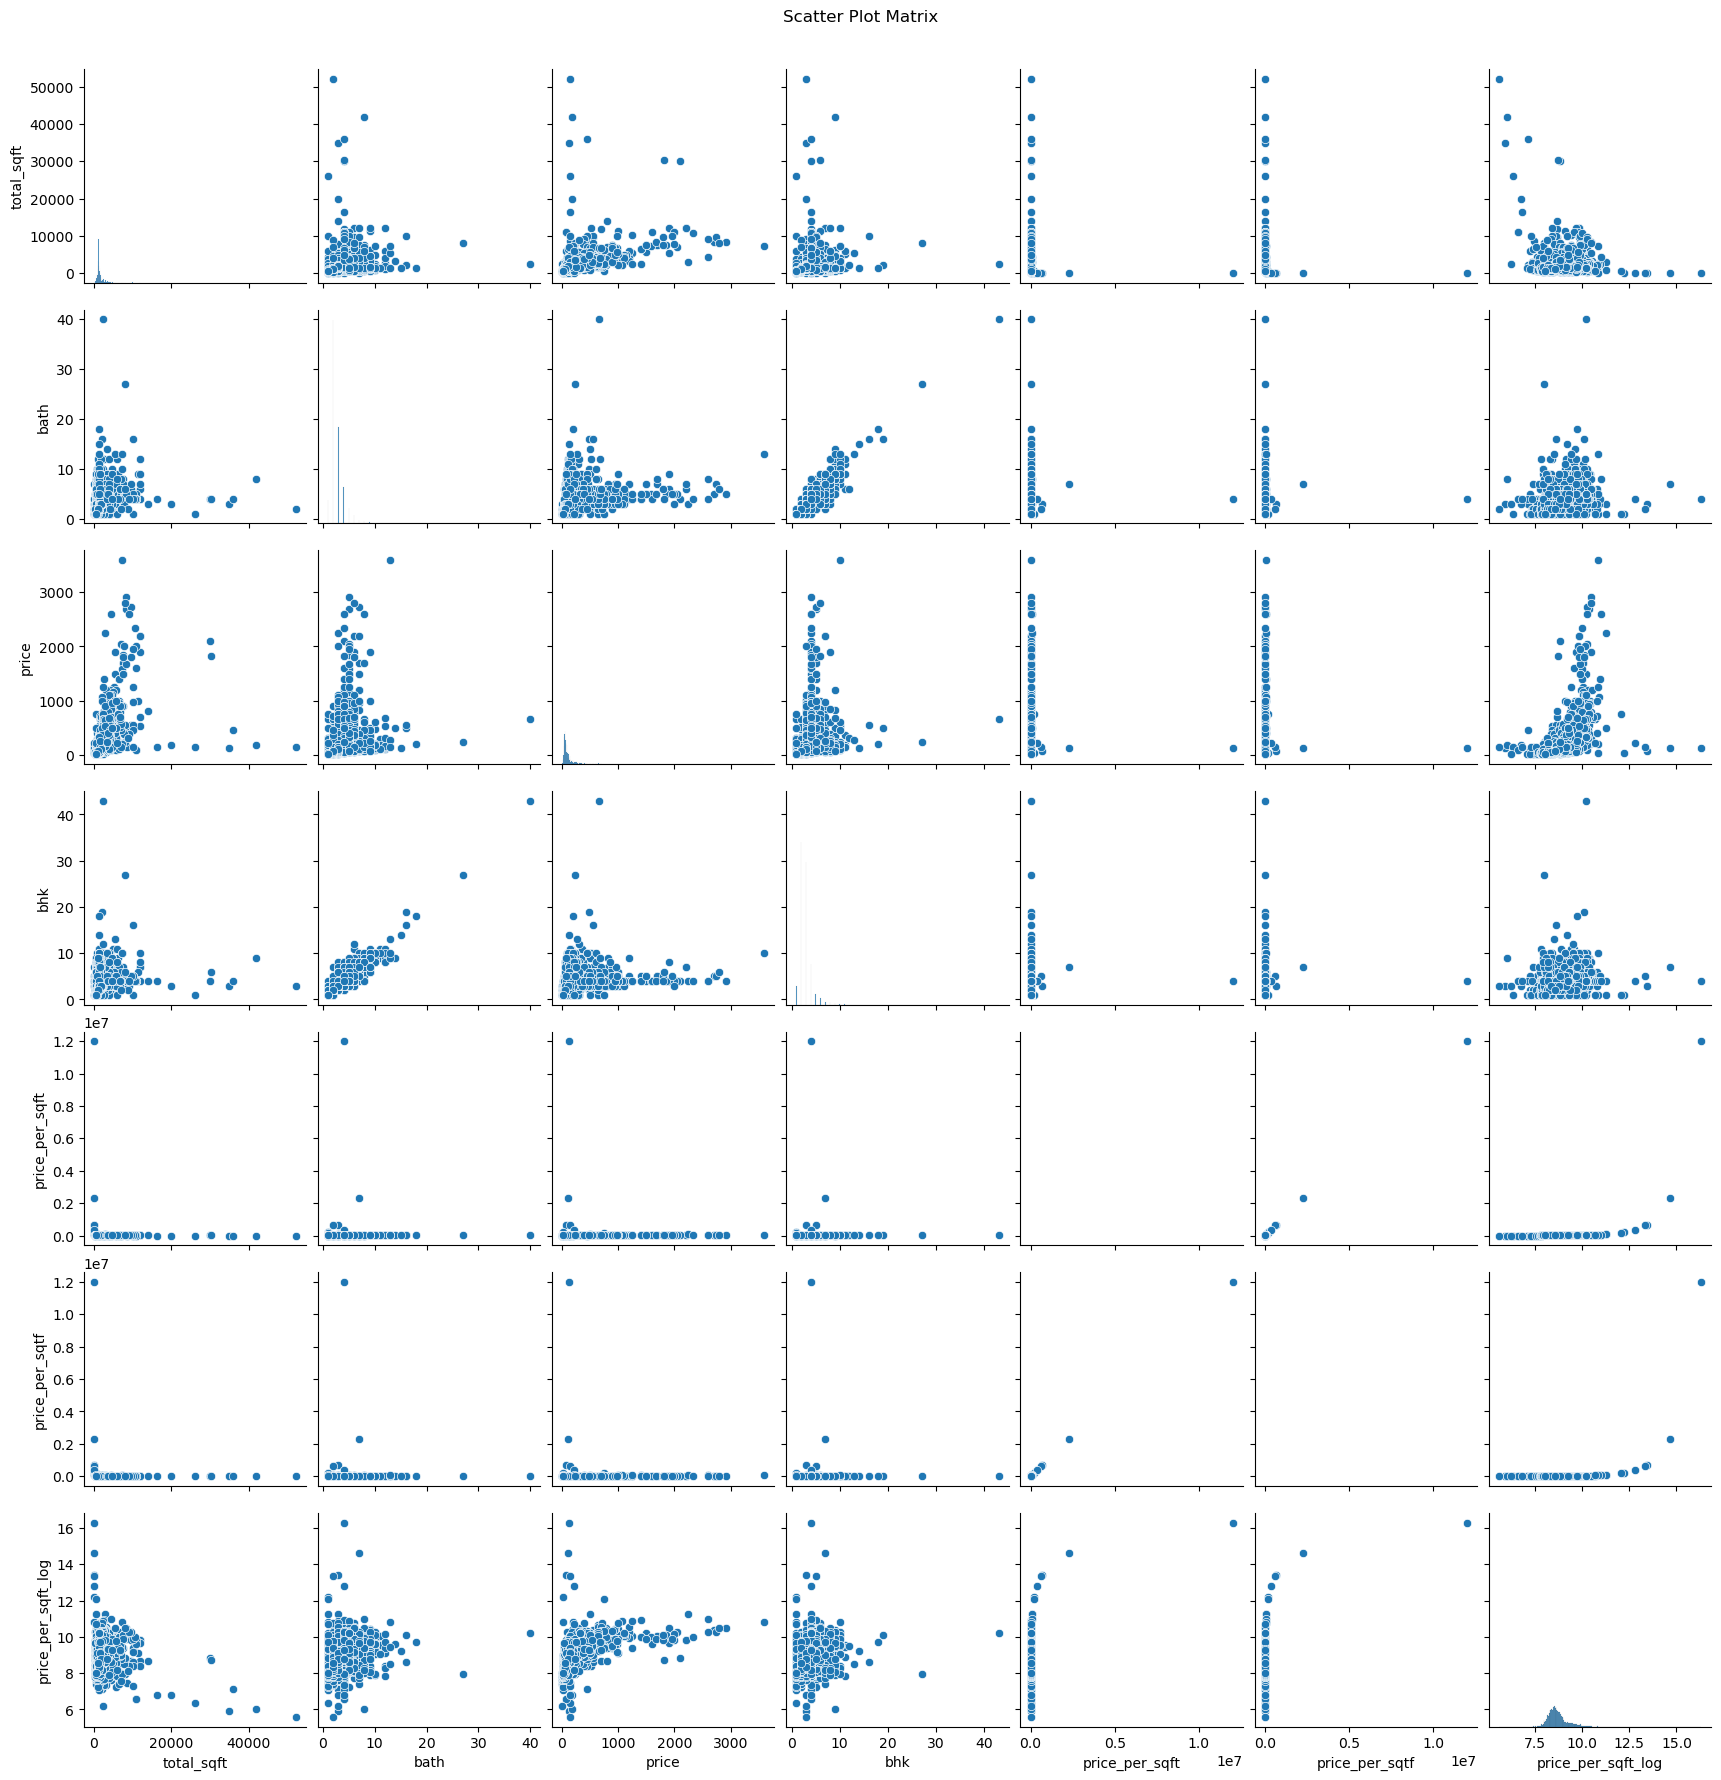

In [42]:
sns.pairplot(numeric_cols)
plt.suptitle("Scatter Plot Matrix", y=1.02)
plt.show()